# 하나의 통합된 데이터
---
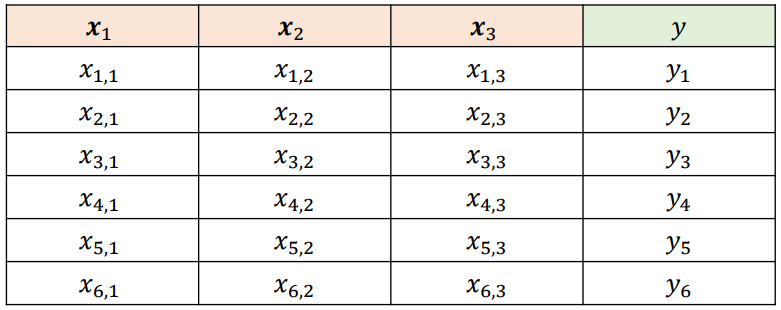

- 지도 학습 모델을 분석하려면 `하나의 통합된 데이터 테이블` 이 반드시 필요하다.
- 하지만 실제데이터의 경우 센서, 로그, 거래 데이터등 크기가 `매우 큰 데이터` 는 `시간과 ID` 등으로 분할되어 저장된 경우가 대다수
- 이를 pandas의 concat 함수를 활용해 `하나의 테이블` 로 만들어 낼 수 있다.

# Tip
---
통합해야 하는 데이터가 많은 경우에는 `빈 데이터 프레임` 을 하나 생성한 뒤, 해당 데이터 프레임과 loop문을 활용해 불러온 데이터를 연속적으로 concat하여 효율적으로 merged_table을 만들어 낼 수 있다.

# 관련 문법 1 : pandas.concat 함수
---
- 둘 이상의 DataFrame을 이어 붙일때 사용하는 함수
- 주요 파라미터
    - objs : DataFrame을 요소로 하는 리스트 ([df1, df2] 와 같은 형태로 입력). 입력 순서대로 병합이 된다.
    - ignore_index : True면 기존 index를 무시하고 '새로운 index'를 부여하고, False는 기존 index를 그대로 사용한다.
       

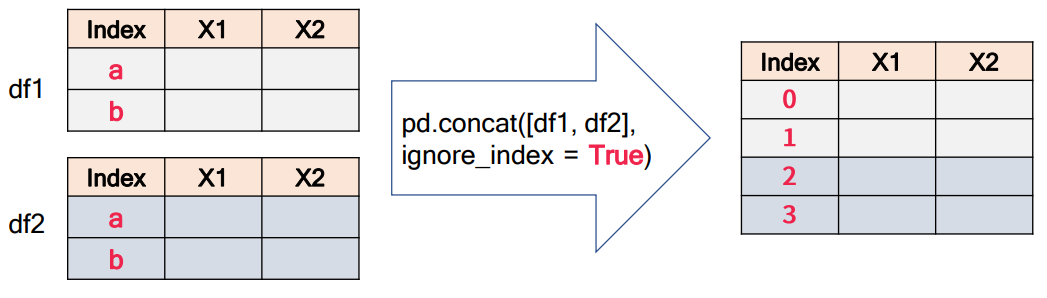

## Tip. Axis 
---
- axis = 0 : 열 방향(컬럼 기준)으로 연산
- axis = 1 : 행 방향(행 기준)으로 연산
---
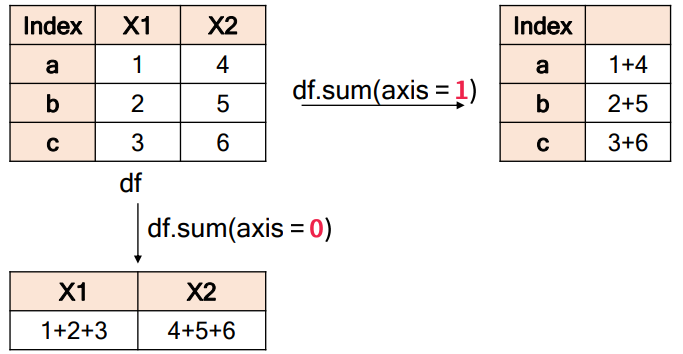

---

**- axis 키워드는 함수의 결과로 출력되는 구조가 벡터(1차원)인지, 행렬 (2차원) 인지에 따라 역할이 다르다.**

---
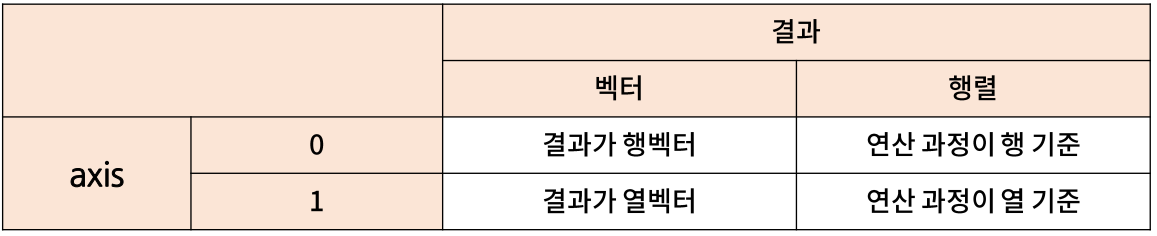

# 관련 문법 2 : os.listdir 함수
---
주요 파라미터
- path : 입력된 경로 (path) 상에 있는 `모든 파일명을 리스트 형태` 로 return

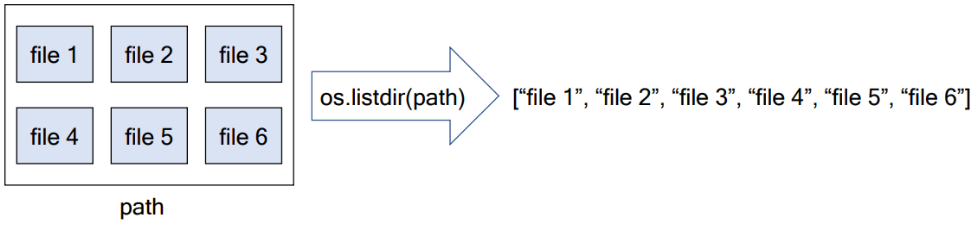

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

# listdir로 폴더상에 포함된 파일 목록 확인하기

In [2]:
os.listdir("에너지 사용량 예측") # 파일 목록 확인

['1월11일.csv',
 '1월12일.csv',
 '1월13일.csv',
 '1월14일.csv',
 '1월15일.csv',
 '1월16일.csv',
 '1월17일.csv',
 '1월18일.csv',
 '1월19일.csv',
 '1월20일.csv',
 '1월21일.csv',
 '1월22일.csv',
 '1월23일.csv',
 '1월24일.csv',
 '1월25일.csv',
 '1월26일.csv',
 '1월27일.csv',
 '1월28일.csv',
 '1월29일.csv',
 '1월30일.csv',
 '1월31일.csv',
 '2월10일.csv',
 '2월11일.csv',
 '2월12일.csv',
 '2월13일.csv',
 '2월14일.csv',
 '2월15일.csv',
 '2월16일.csv',
 '2월17일.csv',
 '2월18일.csv',
 '2월19일.csv',
 '2월1일.csv',
 '2월20일.csv',
 '2월21일.csv',
 '2월22일.csv',
 '2월23일.csv',
 '2월24일.csv',
 '2월25일.csv',
 '2월26일.csv',
 '2월27일.csv',
 '2월28일.csv',
 '2월29일.csv',
 '2월2일.csv',
 '2월3일.csv',
 '2월4일.csv',
 '2월5일.csv',
 '2월6일.csv',
 '2월7일.csv',
 '2월8일.csv',
 '2월9일.csv',
 '3월10일.csv',
 '3월11일.csv',
 '3월12일.csv',
 '3월13일.csv',
 '3월14일.csv',
 '3월15일.csv',
 '3월16일.csv',
 '3월17일.csv',
 '3월18일.csv',
 '3월19일.csv',
 '3월1일.csv',
 '3월20일.csv',
 '3월21일.csv',
 '3월22일.csv',
 '3월23일.csv',
 '3월24일.csv',
 '3월25일.csv',
 '3월26일.csv',
 '3월27일.csv',
 '3월28일.csv',
 '3월29일.csv',
 '3월2일.csv',
 '3

# DataFrame 통합
---
- 추후 정리할 내용에서 5월 데이터는 test데이터로 활용할 예정이기 때문에 제외 하고 통합

In [3]:
df = pd.read_csv("에너지 사용량 예측/2월4일.csv")
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-02-04 00:00:00,30,NaN,22.200000,43.060000,21.390000,42.09,22.600000,43.966667,20.79,...,23.094444,45.824444,18.29,45.156667,3.20,765.30,88.000000,2.000000,40.000000,1.300000
1,2016-02-04 00:10:00,20,0.0,22.166667,43.030000,21.323333,42.03,22.594444,43.933333,20.79,...,23.011111,45.900000,18.29,45.363333,2.95,765.35,88.666667,2.166667,38.166667,1.166667
2,2016-02-04 00:20:00,50,0.0,22.100000,43.163333,21.290000,42.00,22.511111,44.000000,20.73,...,22.932778,46.265556,18.29,45.690000,2.70,765.40,89.333333,2.333333,36.333333,1.033333


In [4]:
df2 = pd.read_csv("에너지 사용량 예측/1월11일.csv")
df2.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30.0,19.89,47.596667,NaN,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,NaN,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,50,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,NaN,55.333333,5.1


- 폴더내의 모든 csv파일이 동일한 컬럼값을 가졌다는 전제
- concat을 할때 기준점으로 삼기 좋은 컬럼을 선택 -> date

In [5]:
merged_df = pd.DataFrame() # 빈 데이터 프레임 생성


# DataFrame 통합
for file in os.listdir("에너지 사용량 예측"): # file이 에너지 사용량 예측 폴더 내에 있는 파일명을 순회
    # csv확장자가 있는 경우만 불러오도록 
    if '5월' not in file and ".csv" in file:  
        df = pd.read_csv("에너지 사용량 예측/" + file) #파일들이 있는 폴더의 위치를 명시해준다.
        # 행 기준(axis=0)으로 빈 DataFrame과 불러온 DataFrame을 병합 + index는 새로 생성
        merged_df = pd.concat([merged_df, df], axis = 0, ignore_index = True)

# 행단위로 붙일 경우 주로 ignore_index = True로 한다.

In [6]:
# listdir()을 통해 보면 1일~9일이 10~19일보다 뒤에 정렬되어 있는 모양이 매달 반복된다. 
# 각 파일명이 string형태이기 때문 
# 이를 정렬하고자 'date'컬럼을 기준으로 sort_values를 해서 정렬을 해준다.

merged_df.sort_values('date', inplace = True) # 날짜 기준 정렬 수행 

merged_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30.0,19.89,47.596667,NaN,44.790000,19.79,44.730000,19.000000,...,18.20,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.30
1,2016-01-11 17:10:00,60,NaN,19.89,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,...,18.20,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.20
2,2016-01-11 17:20:00,50,30.0,19.89,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,...,18.20,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,NaN,55.333333,5.10
3,2016-01-11 17:30:00,50,40.0,19.89,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,...,18.10,48.590000,17.000000,NaN,6.250000,733.800000,92.000000,6.000000,51.500000,NaN
4,2016-01-11 17:40:00,60,40.0,19.89,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,...,18.10,48.590000,17.000000,NaN,6.133333,733.900000,92.000000,5.666667,NaN,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14869,2016-04-30 23:10:00,40,0.0,21.29,38.500000,18.633333,41.290000,23.29,36.290000,19.790000,...,22.39,38.363333,19.200000,37.790000,5.216667,763.366667,82.666667,2.833333,40.000000,2.45
14870,2016-04-30 23:20:00,20,0.0,21.26,38.430000,18.600000,41.326667,23.20,36.290000,19.790000,...,22.39,39.000000,19.200000,37.863333,5.033333,763.433333,83.333333,2.666667,40.000000,2.40
14871,2016-04-30 23:30:00,40,0.0,21.20,38.290000,18.533333,41.400000,23.20,36.290000,19.790000,...,22.39,39.400000,19.200000,38.030000,4.850000,763.500000,84.000000,2.500000,40.000000,2.35
14872,2016-04-30 23:40:00,30,0.0,21.20,38.260000,18.500000,41.450000,23.20,36.290000,19.790000,...,22.29,39.656667,19.200000,38.090000,4.666667,763.566667,84.666667,2.333333,40.000000,2.30
